<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [1]:
%matplotlib inline

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
# from js import fetch
# import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [3]:
boston_df=pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
#top 5 rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


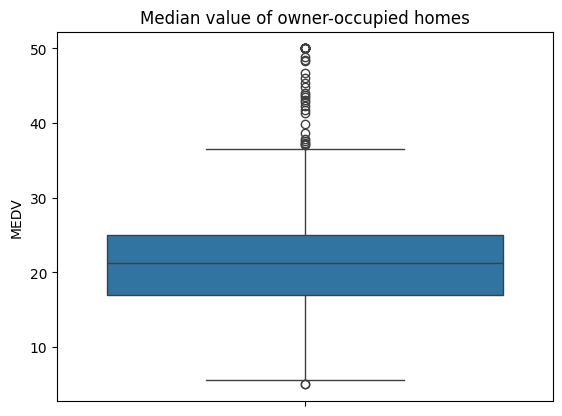

In [5]:
#boxplot of Median value of owner-occupied homes
ax = sns.boxplot(y='MEDV', data=boston_df)

plt.title("Median value of owner-occupied homes")
plt.show()


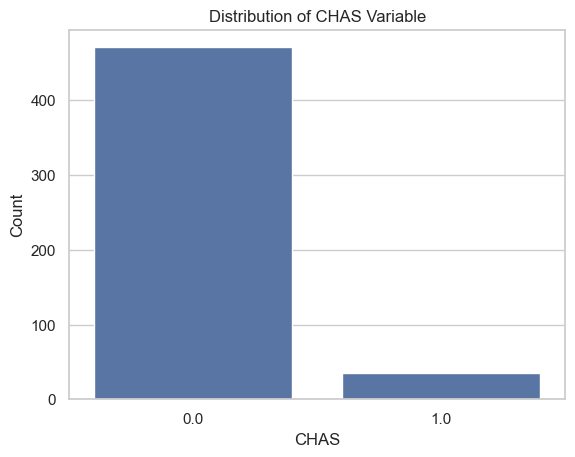

In [6]:
#bar plot for the Charles river variable

chas_counts = boston_df["CHAS"].value_counts() #count the occurrences of CHAS variables 1.0 & .0.0 from the df
sns.set(style="whitegrid")
ax = sns.barplot(x=chas_counts.index, y=chas_counts.values)

plt.ylabel("Count")
plt.title("Distribution of CHAS Variable")
plt.show()

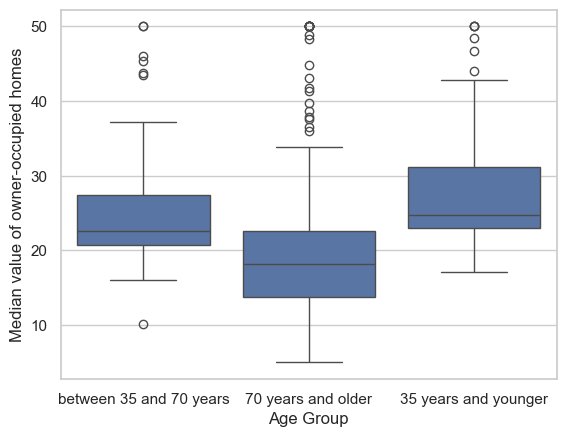

In [7]:
#boxplot for the MEDV variable vs the AGE variable (the age variable will be discretized)
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

ax = sns.boxplot(x='AGE_GRP', y='MEDV', data=boston_df)
plt.xlabel("Age Group")
plt.ylabel("Median value of owner-occupied homes")
plt.show()

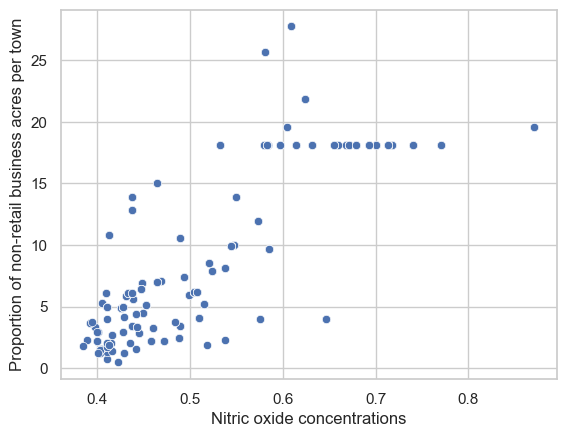

In [8]:
#scatterplot to show relationship between Nitric oxide concentrations and the proportion of
#non-retail business acres per town
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel("Nitric oxide concentrations")
plt.ylabel("Proportion of non-retail business acres per town")
plt.show()


##### The above scatterplot shows a strong, positive relationship between the variables (Nitric oxide concentrations and the proportion of non-retail business acres per town)

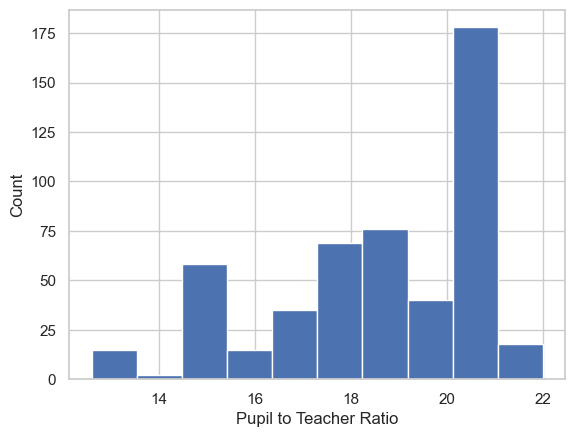

In [9]:
#histogram for the pupil to teacher ratio
plt.hist(boston_df['PTRATIO'])
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Count")
plt.show()

## Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test)

##### Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not
##### Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not

In [10]:
#checking variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

##### The Levene test pvalue is less than 0.05 so we cannot assume that the variances are equal

In [11]:
#t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

##### The T test shows a pvalue that is less than 0.05 therefore we can reject the null hypothesis as there is sufficient evidence to suggest that there is a significant difference in median value of houses bounded by the Charles river or not

####

  ####

### Is there a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

##### Null Hypothesis: There is no difference in median value of houses for each proportion of owner occupied units built prior to 1940
##### Alternative Hypothesis: There is a difference in median value of houses for each proportion of owner occupied units built prior to 1940

In [12]:
thirtyfive_and_lower_medv = boston_df[boston_df['AGE_GRP'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['AGE_GRP'] == 'between 35 and 70 years']['MEDV']
seventy_older_medv = boston_df[boston_df['AGE_GRP'] == '70 years and older']['MEDV']

In [13]:
#ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_and_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### The ANOVA test shows a pvalue that is less than 0.05 therefore we can reject the null hypothesis as there is sufficient evidence to suggest that there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940

###

###

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
##### Alternative Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [14]:
#Pearson Correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

##### The Pearson Correlation test shows a pvalue that is less than 0.05 therefore we can reject the null hypothesis as there is sufficient evidence to suggest that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. Furthermore, the correlation coefficient of 0.76 shows a strong, positive correlation

###

###

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression Analysis)

##### Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
##### Alternative Hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [15]:
#Regression Analysis

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        16:25:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The Regression Analysis shows a pvalue that is less than 0.05 therefore we can reject the null hypothesis as there is sufficient evidence to suggest that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. Furthermore, the DIS coefficient tells us that every additional distance leads to an increase in the median value of owner occupied homes, by approximately 1.09 units.